In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import preprocessing
import csv
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
def loadData(path):
    '''
        加载全部的训练样本和标签
    '''
    features = {}
    labels = {}
    with h5py.File(path, 'r') as f:
#         print(list(f.keys()))
        features = f['train_feat']
        labels = f['train_label']
        features = np.mat(features).T
        labels = np.mat(labels).T
        print(labels.shape)
        print(features.shape)
    return features,labels

In [3]:
def loadTestData(path):
    features = {}
    with h5py.File(path, 'r') as f:
#         print(list(f.keys()))
        features = f['test_feat']
        features = np.mat(features).T
        print(features.shape)
    return features

In [3]:
    file_train = "train_data.mat"
    file_test = 'test_data_raw.mat'
    file_out = 'submission_sample.csv'
    file_training_set = "training_set.mat"
    file_validation_set = "validation_set.mat"

In [6]:
print("------------------1. 加载训练数据---------------")
training_feat, training_label = loadData(file_train)

------------------1. 加载训练数据---------------
(76240, 1)
(76240, 6812)


In [ ]:
print("------------------2. 打乱训练数据---------------")
training_data = np.hstack([training_feat, training_label])
np.random.shuffle(training_data)
X_train = training_data[:, :-1]
y_train = training_data[:, -1]

------------------2. 打乱训练数据---------------


In [ ]:
print("------------------3. 数据均值归一化---------------")
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
X_train = (X_train-x_mean)/x_std

In [ ]:
print("------------------4. 数据均值归一化（保存）---------------")
sio.savemat('X_train.mat',{'X_train':X_train})
sio.savemat('y_train.mat',{'y_train':y_train})

In [7]:
print('------------------------导入数据集-------------------------')
X_train = sio.loadmat('X_train.mat')['X_train']
y_train = sio.loadmat('y_train.mat')['y_train']
print(X_train.shape)
print(y_train.shape)

------------------------导入数据集-------------------------
(76240, 6812)
(76240, 1)


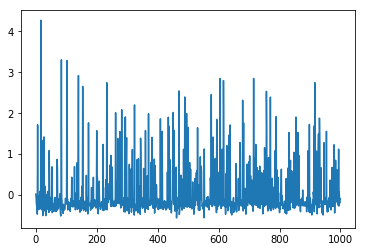

In [13]:
plt.figure()
plt.plot(X_train[10000,5000:6000])
plt.show()

In [ ]:
print('------------------------分割数据集-------------------------')
X_train, X_test, y_train, y_test = train_test_split(X, training_label, test_size=0.1, random_state=400)
sio.savemat('X_train.mat',{'X_train':X_train})
sio.savemat('X_test.mat',{'X_test':X_test})
sio.savemat('y_train.mat',{'y_train':y_train})
sio.savemat('y_test.mat',{'y_test':y_test})

In [4]:
print('------------------------导入分割后的数据集-------------------------')
X_train = sio.loadmat('X_train.mat')['X_train']
X_test = sio.loadmat('X_test.mat')['X_test']
y_train = sio.loadmat('y_train.mat')['y_train']
y_test = sio.loadmat('y_test.mat')['y_test']
print(X_train.shape)
print(y_train.shape)

------------------------导入数据集-------------------------
(68616, 6812)
(68616, 1)


In [ ]:
print("-------------------------开始训练----------------------------")
mlp = MLPClassifier(solver='sgd',learning_rate_init  = 0.1, alpha=0.0001, max_iter=120,shuffle = True, 
                    activation='logistic',batch_size=128,verbose=True,
                   hidden_layer_sizes=(1200,))
mlp.fit(X_train,y_train)

-------------------------开始训练----------------------------


C:\Users\jiamoufang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print("--------------------------训练准确率------------------------")
print(mlp.score(X_train,y_train))

--------------------------训练准确率------------------------
1.0


In [32]:
print (mlp.n_layers_)
print(mlp.n_iter_)
print( mlp.loss_)
print (mlp.out_activation_)
print (mlp.hidden_layer_sizes)

3
40
0.00780301400025
softmax
(1200,)


In [34]:
    print("-------------------开始验证----------------")
#     validation_set = training_set = sio.loadmat(file_validation_set)['validation_set']
#     vm,vn = validation_set.shape
#     validation_feat = validation_set[:,0:vn-1]
# #     mean normalize
#     validation_feat_scale = scaler.transform(validation_feat)
#     validation_feat_norm = preprocessing.normalize(validation_feat_scale, norm='l2')
    
#     validation_label = validation_set[:,-1]
    
#     vali_y_pred = mlp.predict(X_test)
    
#     validation_acc = metrics.accuracy_score(y_test,vali_y_pred)
    print("------------------验证准确率---------------")
#     print(validation_acc)
    print(mlp.score(X_test,y_test))

-------------------开始验证----------------
------------------验证准确率---------------
0.361621196222


In [35]:
def save_result(file_name, result):
    '''保存最终的预测结果
    input:  file_name(string):保存最终结果的文件名
            result(mat):最终的预测结果
    '''
    with open(file_name) as csvFile:
        rows = csv.reader(csvFile)
        with open("file_n_hidden_1200_adaptive.csv",'w', newline='') as f:
            writer = csv.writer(f)
            for index,row in enumerate(rows):
                tmp_row = row
                if index >= 1:
                    # tmp_row[-1] = int(result[index-1,0])
                    tmp_row[-1] = int(result[index-1])
                writer.writerow(tmp_row)

In [36]:
    print("------------------开始测试---------------")
    test_feat = loadTestData(file_test)
    test_mean = test_feat.mean(axis=0)
    test_std = test_feat.std(axis=0)
    test_feat_scaled = (test_feat-test_mean)/test_std
    p = mlp.predict(test_feat_scaled)
    
    print("--------------------保存结果----------------")
    print(p.shape)
    save_result(file_out,np.mat(p).T)
    print("--------------------保存模型----------------")

------------------开始测试---------------
(19850, 6812)
--------------------保存结果----------------
(19850,)
--------------------保存模型----------------


In [37]:
print(mlp.get_params())

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 128, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1200,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 80, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [38]:
def readFile(filename):
    labels_pred =[]
    with open(filename) as f:
        reader = csv.reader(f)
        for index,row in enumerate(reader):
            if index > 0:
                labels_pred.append(int(row[-1]))
    return labels_pred

In [39]:
labels_pred_1 = readFile('file_n_hidden_1200_adaptive.csv')
labels_pred = readFile('file_n_hidden_1200.csv')

In [40]:
l = len(labels_pred_1)
count = 0
for i in range(l):
    if labels_pred_1[i] == labels_pred[i]:
        count = count + 1
count/l

0.6703274559193955